In [1]:
import pandas as pd
from ipyleaflet import Map, GeoJSON, Marker, CircleMarker, DrawControl, ScaleControl, Rectangle, DivIcon
import ipywidgets as ipyw
from pandas.io.json import json_normalize
import CacatoesUtils
import PluvioSahelUtils
from ipywidgets import HTML
import proplot as pplot
import numpy as np
import datetime
import scipy.stats
import Run_MCS_Climatology

In [2]:
niger_cell = [[2.0, 3.0], [13.0, 14.0]]
wantedIndice = {}
wantedIndice[0] = ['NB MCS','Nombre de MCS','Nombre de MCS',['ur','lr']]
wantedIndice[1] = ['Fraction cell index 235K','Fraction de la maille 1°x1° occupée par le MCS à 235°K','Fraction en %',['ur','lr']]
wantedIndice[2] = ['Temp brightness mini','Température de brillance minimale du MCS','Température en °K',['ur','lr']]
wantedIndice[3] = ['Grid fraction 235K x durée totale','Durée de vie totale pondérée par la fraction de la maille','Durée pondérée (h)',['ur','lr']]
wantedIndice[4] = ['Grid fraction 235K x Smax 235','     Surface maximale à 235°K pondérée par la fraction de la maille','Surface pondérée (km²)',['ur','lr']]
wantedIndice[5] = ['Smax 235 index','    Surface maximale à 235°K','Surface en km²',['ur','lr']]
wantedIndice[6] = ['Durée totale','Durée de vie totale','Durée en h',['ur','lr']]
wantedIndice[7] = ['Duration normalized with distance before Tmax','Durée de passage au dessus de la maille pondérée par la distance avant le Tmax','Durée pondérée (h)',['ur','lr']]
wantedIndice[8] = ['Duration normalized with distance all life','Durée de passage au dessus de la maille pondérée par la distance','Durée pondérée (h)',['ur','lr']]
wantedIndice[9] = ['Durée sur cellule','Durée de passage au dessus de la maille','Durée en h',['ur','lr']]
wantedIndice[10] = ['Durée avant Tmax','Durée de passage au dessus de la maille avant le Tmax','Durée en h',['ur','lr']]
wantedIndice[11] = ['INT_Tbavg208K_at_Tmax','T° moyenne en dessous du seuil 208°K à Tmax','T° en K',['ur','lr']]
wantedIndice[12] = ['INT_Ecc220K_at_Tmax','Excentricité ellipse MCS au seuil 220°K à Tmax','Excentricité (1<=>cercle)',['ul','ul']]
wantedIndice[13] = ['INT_orientation220K_at_Tmax','Orientation ellipse MCS au seuil 220°K à Tmax','Orientation (<0 => Ouest; 0<=> Nord; >0 =>Est)',['ul','ul']]
wantedIndice[14] = ['Distance MCS index','Distance parcourue par le centre de gravité du MCS','Distance en km',['ur','lr']]
wantedIndice[15] = ['Speed index','Vitesse moyenne du centre de gravité du MCS','Vitesse en km/h',['ur','lr']]
wantedIndice[16] = ['Speed before Tmax index','Vitesse moyenne avant le Tmax','Vitesse en km/h',['ur','lr']]
wantedIndice[17] = ['Speed after Tmax index','Vitesse moyenne après le Tmax','Vitesse en km/h',['ur','lr']]
wantedIndice[18] = ['Jirak','Classification Jirak','N° de classe',['ur','ul']]
wantedIndice[19] = ['Distance before Tmax index','Distance parcourue avant le Tmax','Distance en km',['ur','lr']]
wantedIndice[20] = ['Distance after Tmax index','Distance parcourue après le Tmax','Distance en km',['ur','lr']]

t1,t2,t3,t4 = Run_MCS_Climatology.GetAllMCSDataFromCacatoesAndAmmaCatch(1990, 2016, niger_cell, 0.5, wantedIndice,'', '../CACATOES/AMMA-CATCH/')

seuilPluvio= 0.5
CheckDateOnMaxDoCalculationOnMean= True
ville: moyenne
ville: max
ville: std
nombre de jours supérieurs au seuil: 1725
suppression des jours au delà du seuil MaxMcs:  25  ou sans aucun MCS
suppression du jour : 1990-10-01 06:00:00 NbMCS =  0 Pluie =  13.06
suppression du jour : 1991-05-08 06:00:00 NbMCS =  0 Pluie =  11.5
suppression du jour : 1991-07-11 06:00:00 NbMCS =  0 Pluie =  36.97
suppression du jour : 1992-04-30 06:00:00 NbMCS =  0 Pluie =  11.82
suppression du jour : 1992-07-01 06:00:00 NbMCS =  0 Pluie =  32.97
suppression du jour : 1992-09-10 06:00:00 NbMCS =  0 Pluie =  20.41
suppression du jour : 1992-09-11 06:00:00 NbMCS =  0 Pluie =  30.89
suppression du jour : 1992-09-12 06:00:00 NbMCS =  0 Pluie =  40.25
suppression du jour : 1992-09-14 06:00:00 NbMCS =  0 Pluie =  22.39
suppression du jour : 1992-09-15 06:00:00 NbMCS =  0 Pluie =  15.02
suppression du jour : 1992-09-29 06:00:00 NbMCS =  0 Pluie =  13.280000000000001
suppression du jour : 1993-07-29 0

Valeur pour le percentile : 85  en pluie moyenne =  16.78727272727272 mm
Valeur pour le percentile : 90  en pluie moyenne =  19.89709090909091 mm
Valeur pour le percentile : 99.5  en pluie moyenne =  43.34730909090914 mm


C:\ProgramData\Anaconda3\lib\site-packages\proplot\axes\cartesian.py:646: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_major_formatter(formatter)


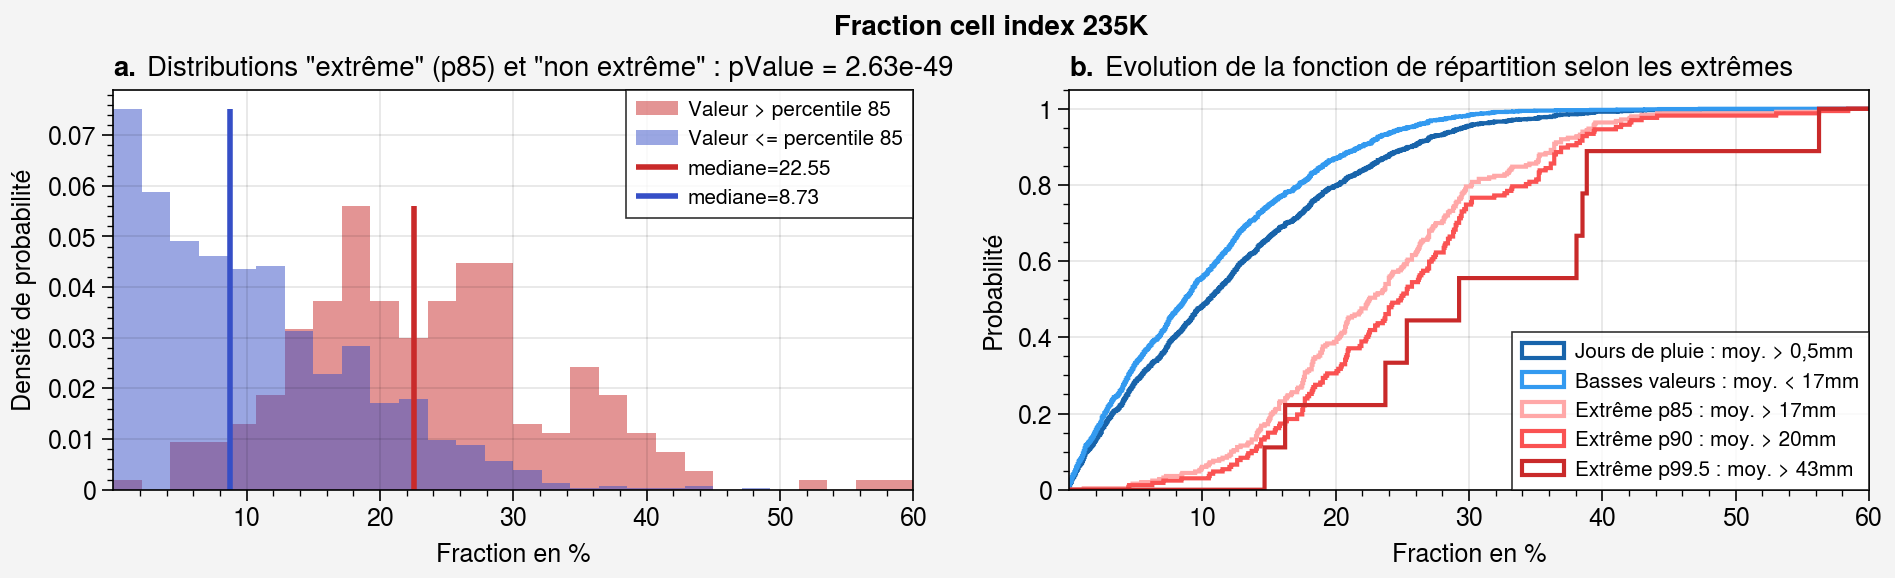

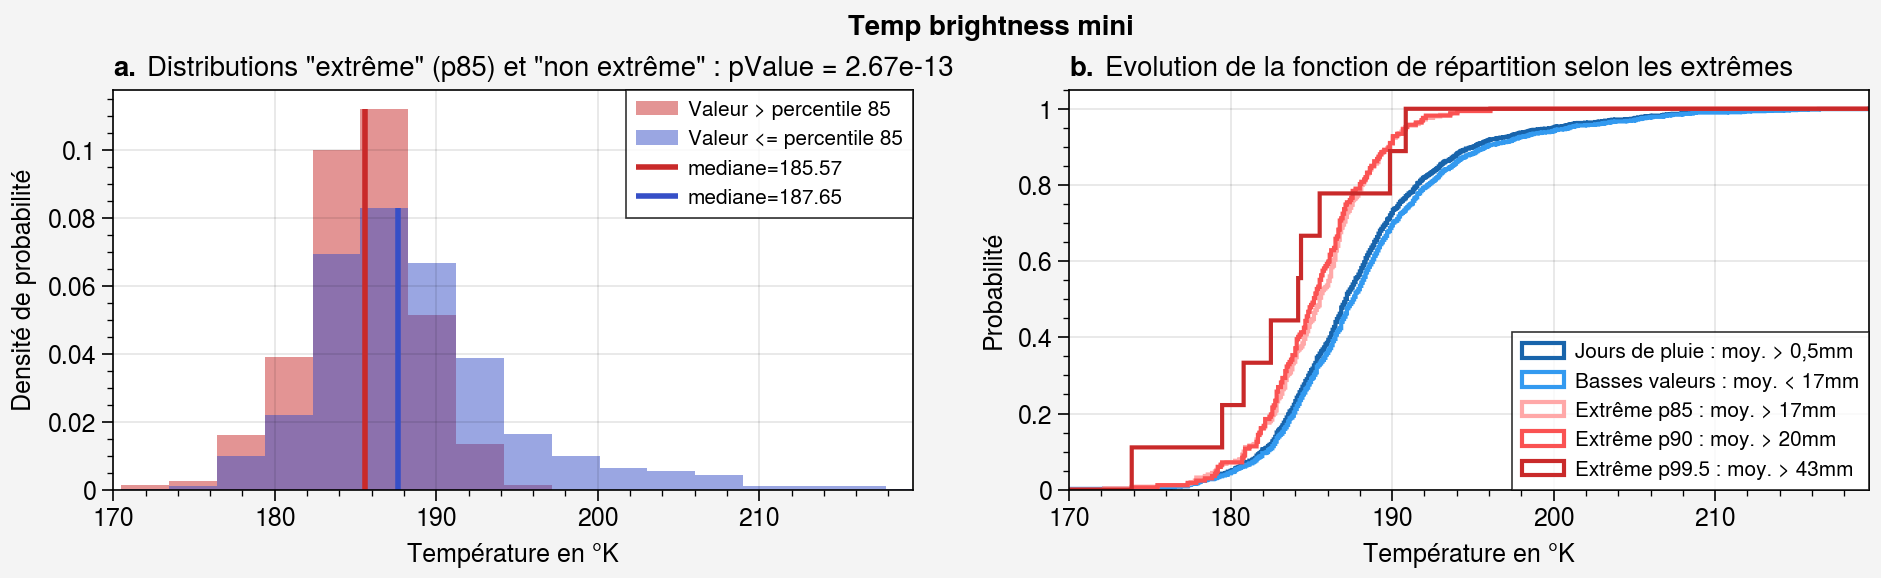

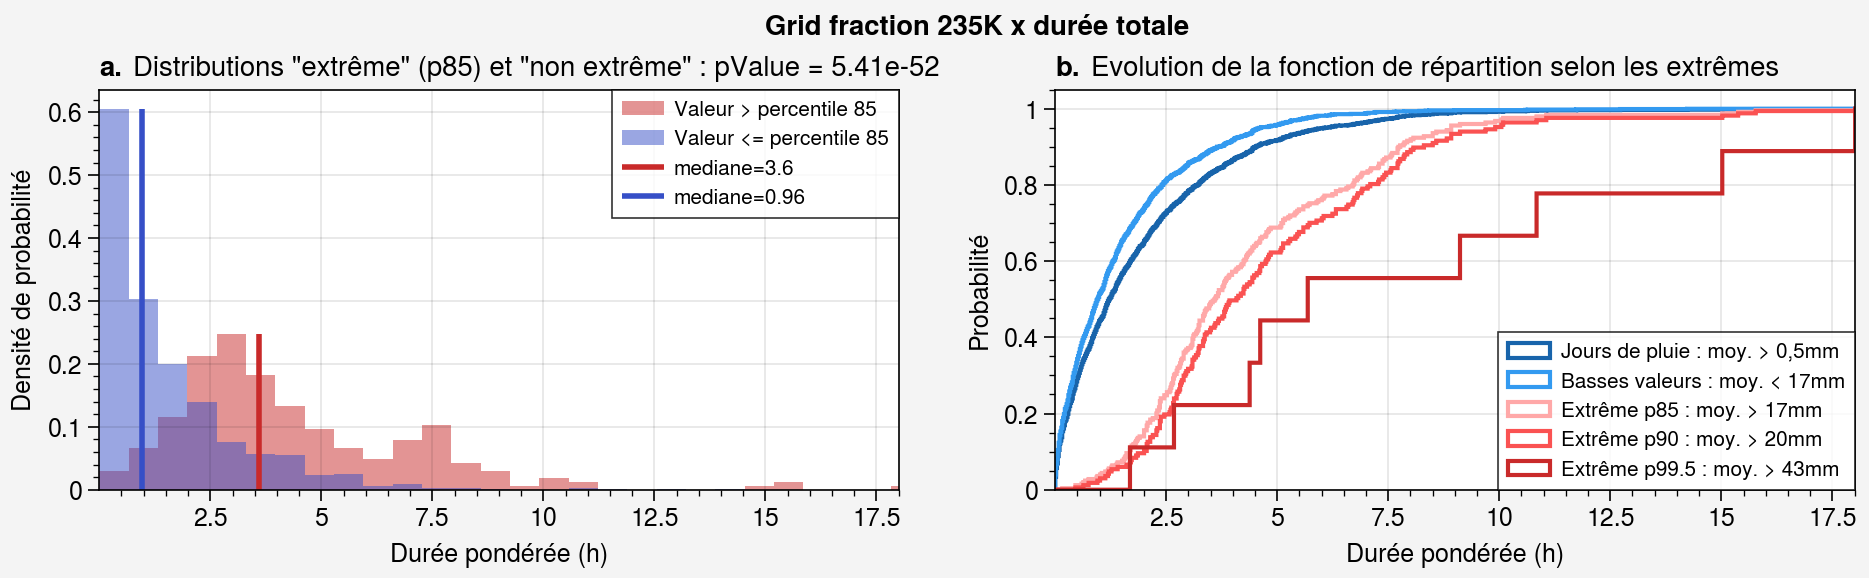

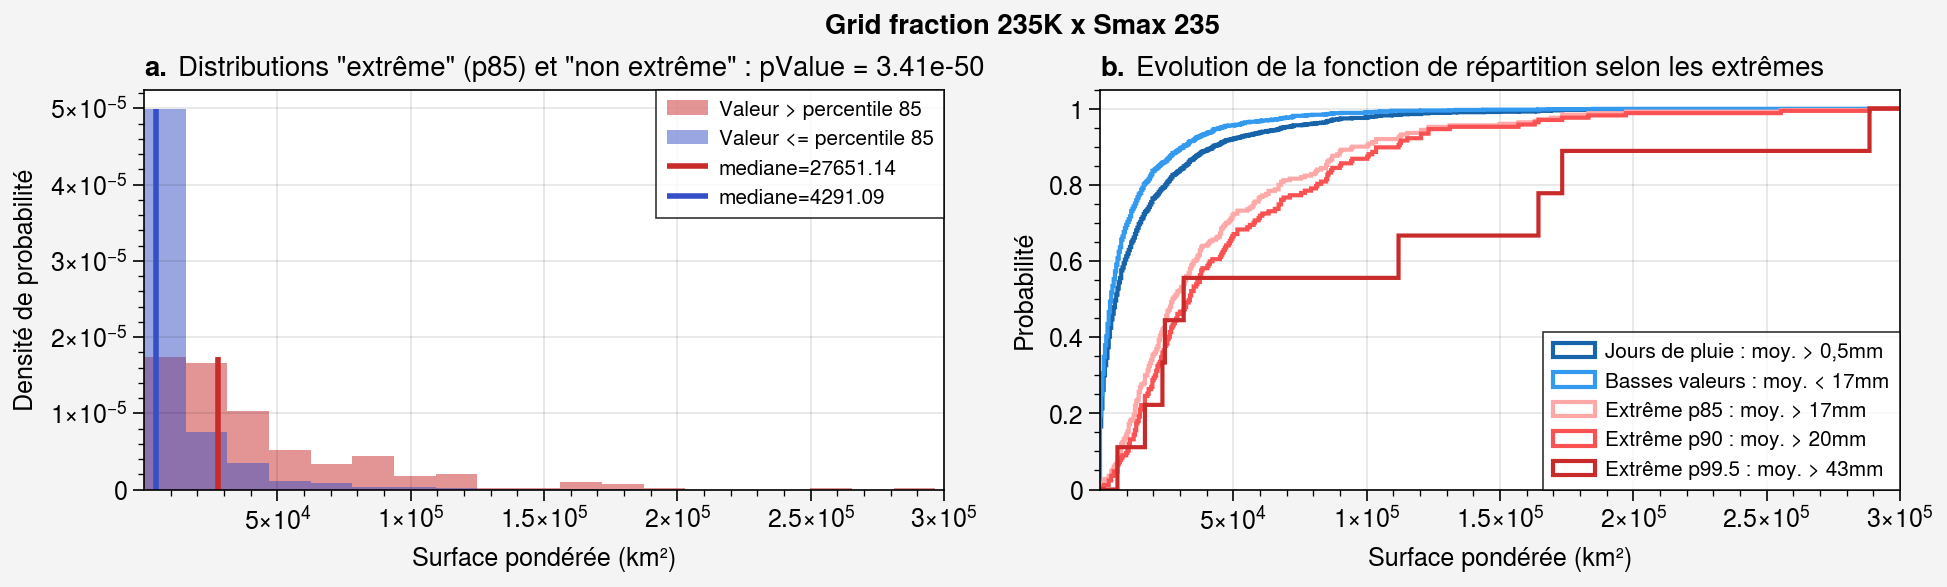

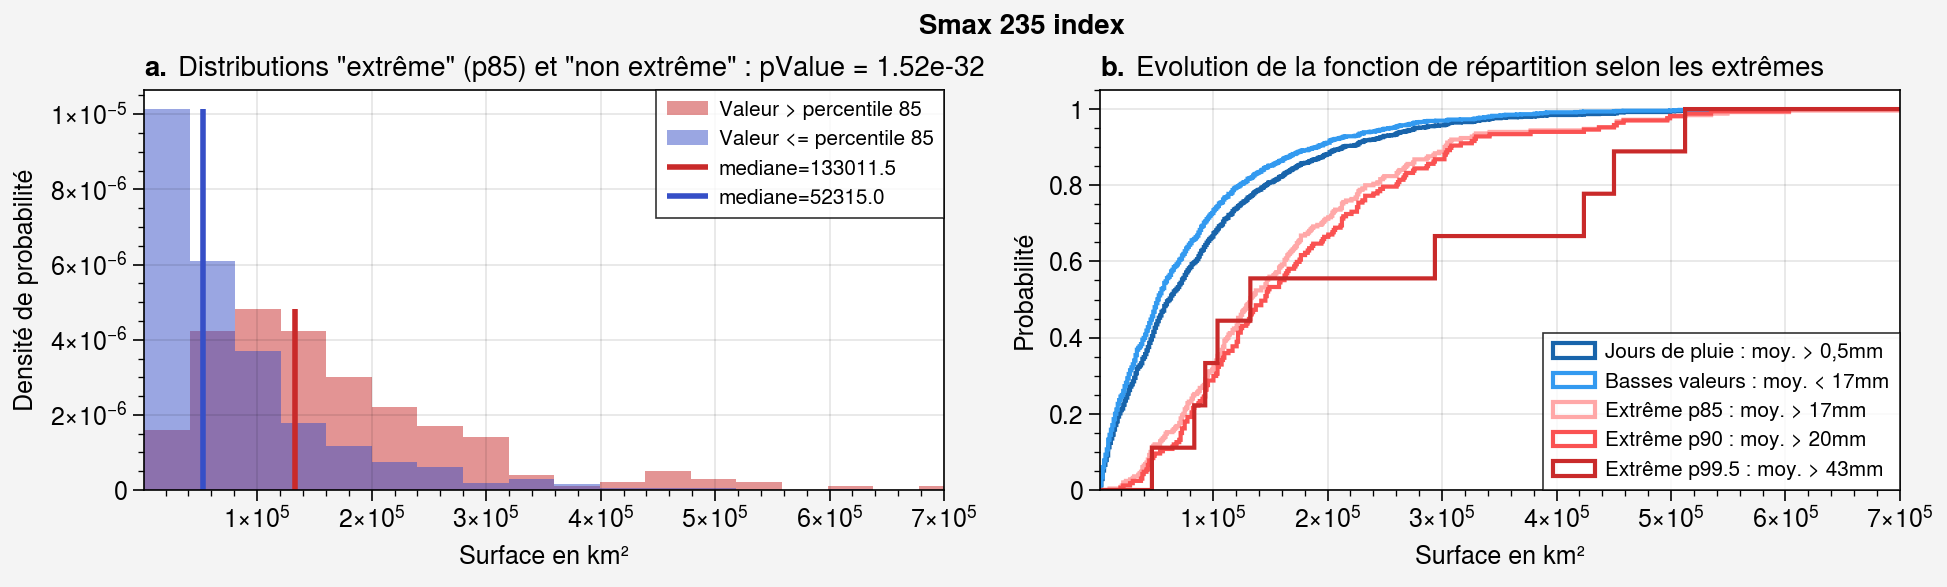

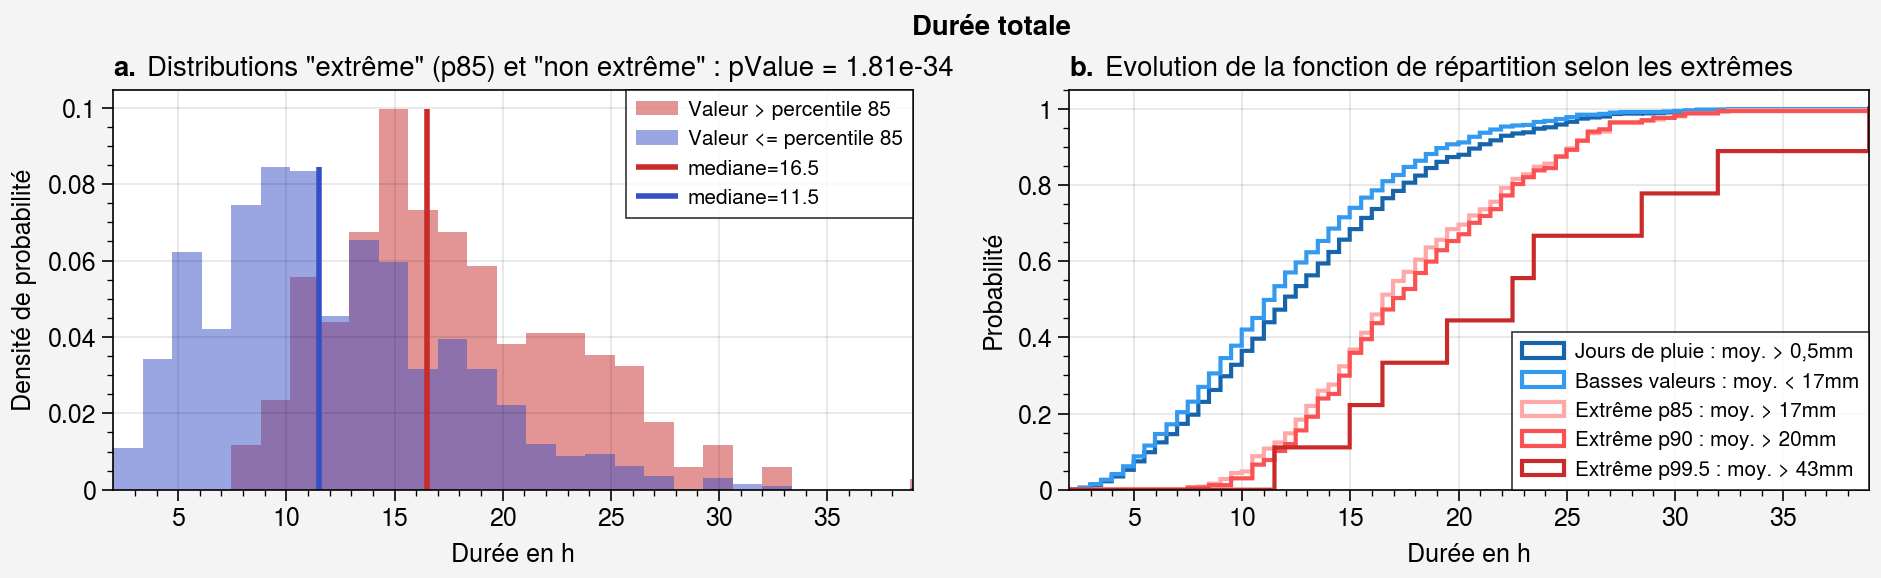

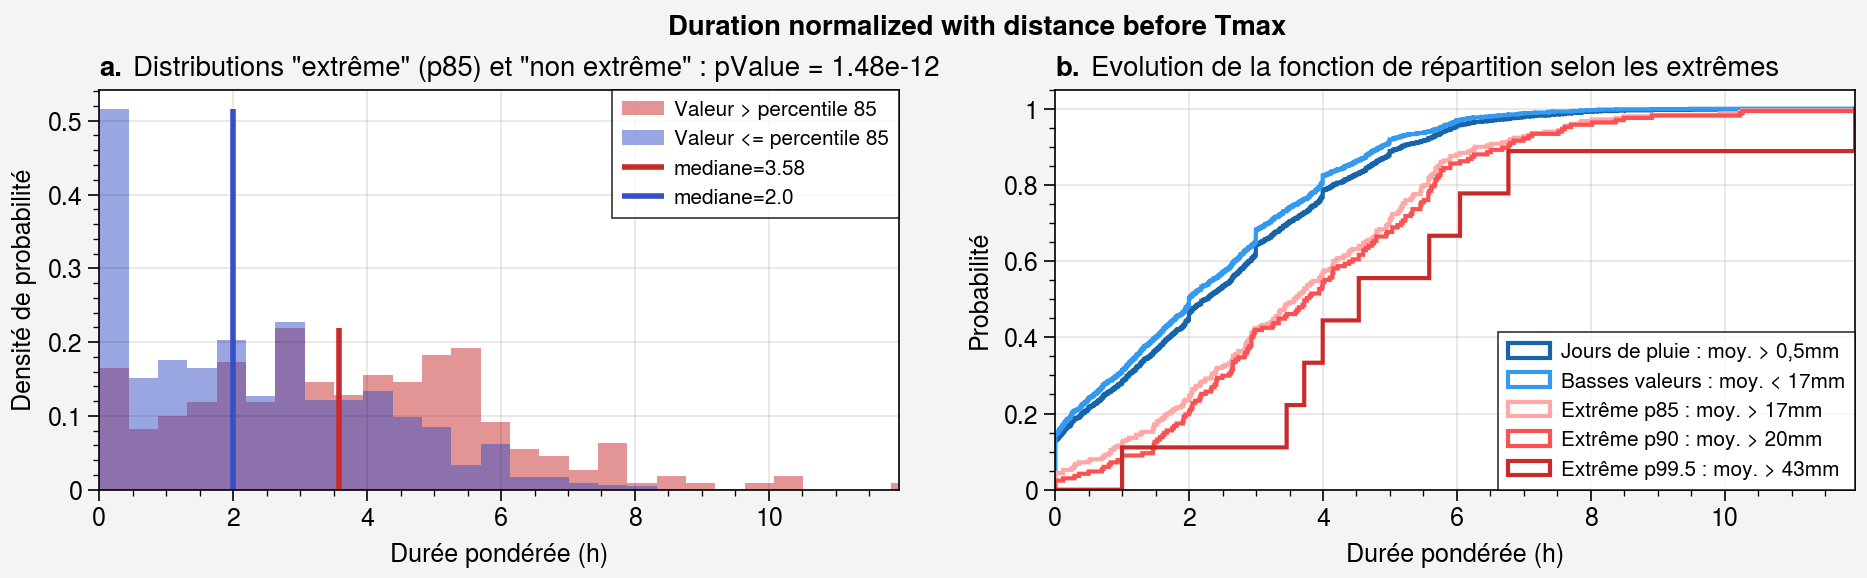

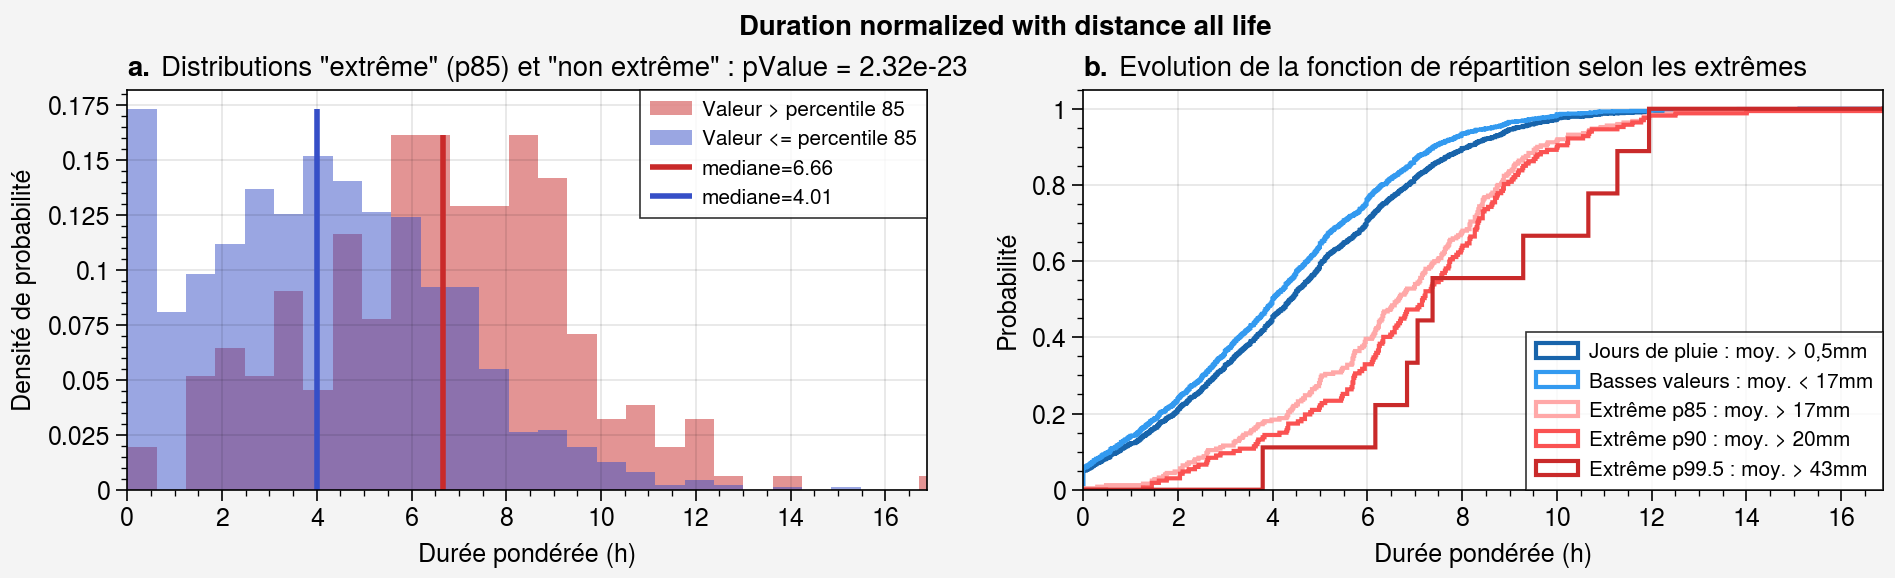

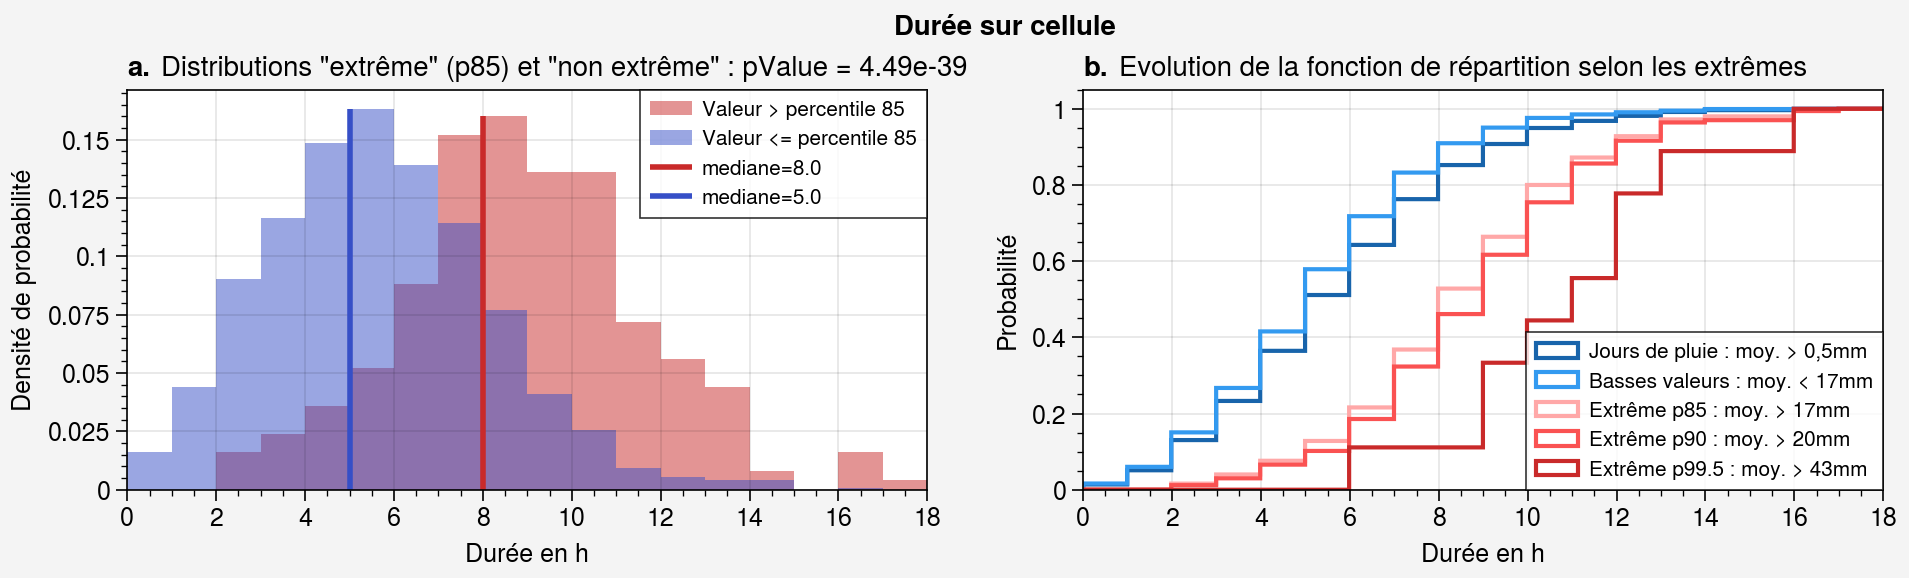

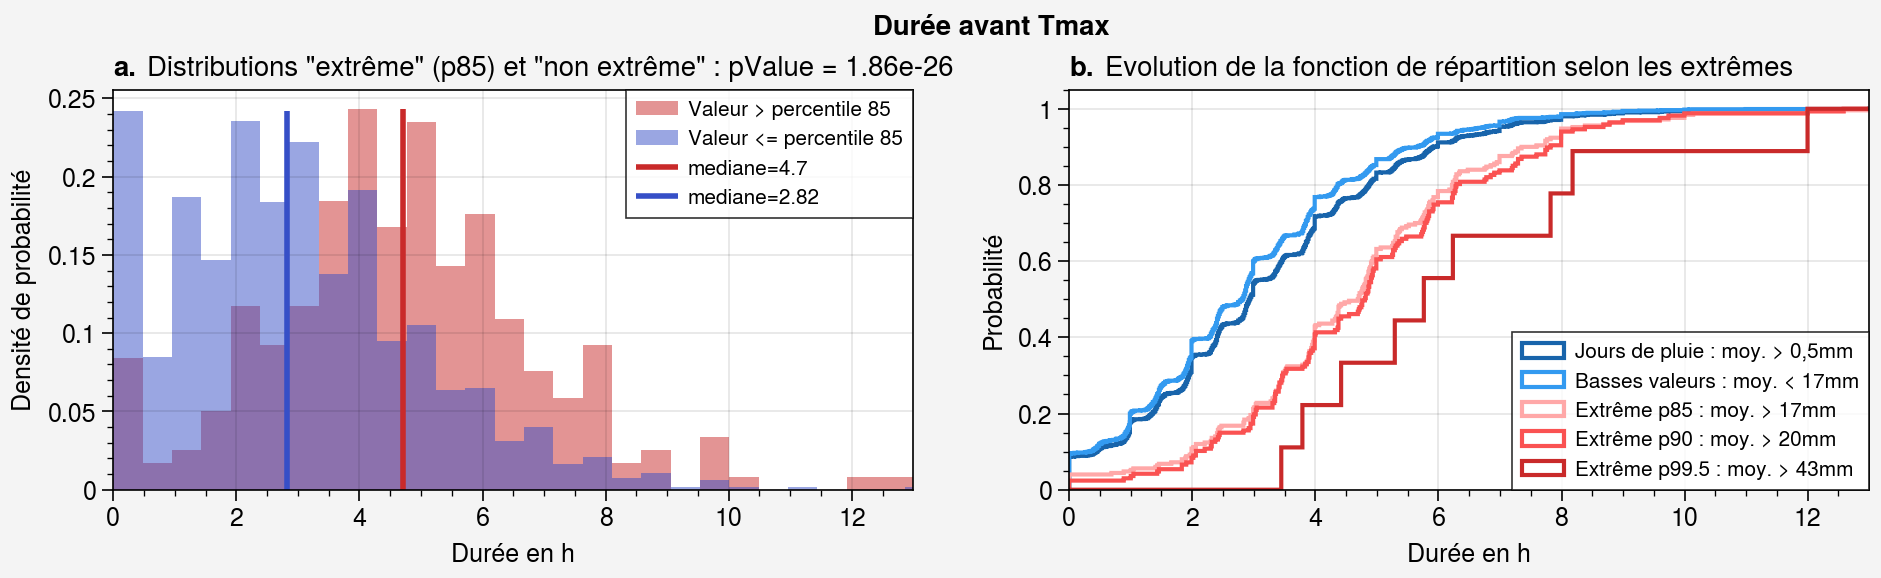

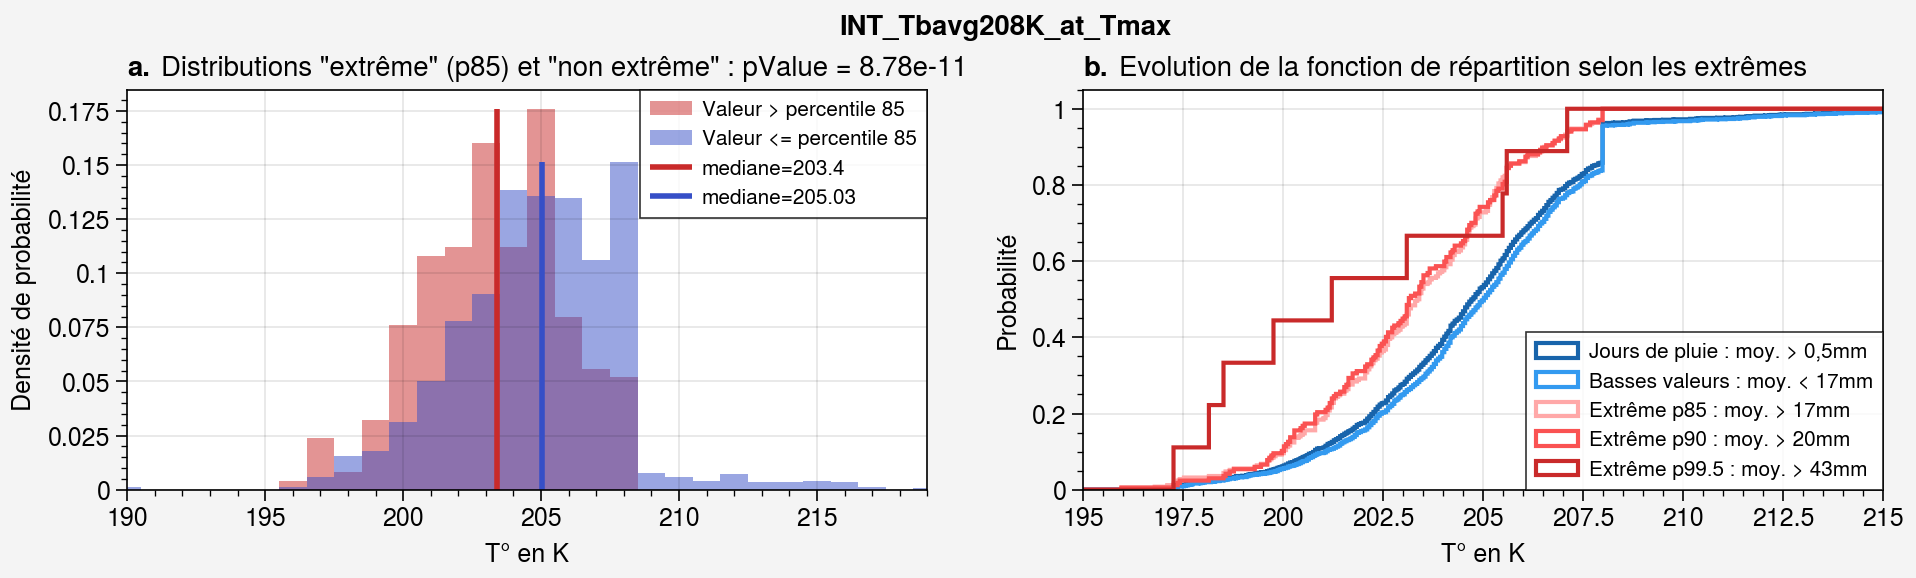

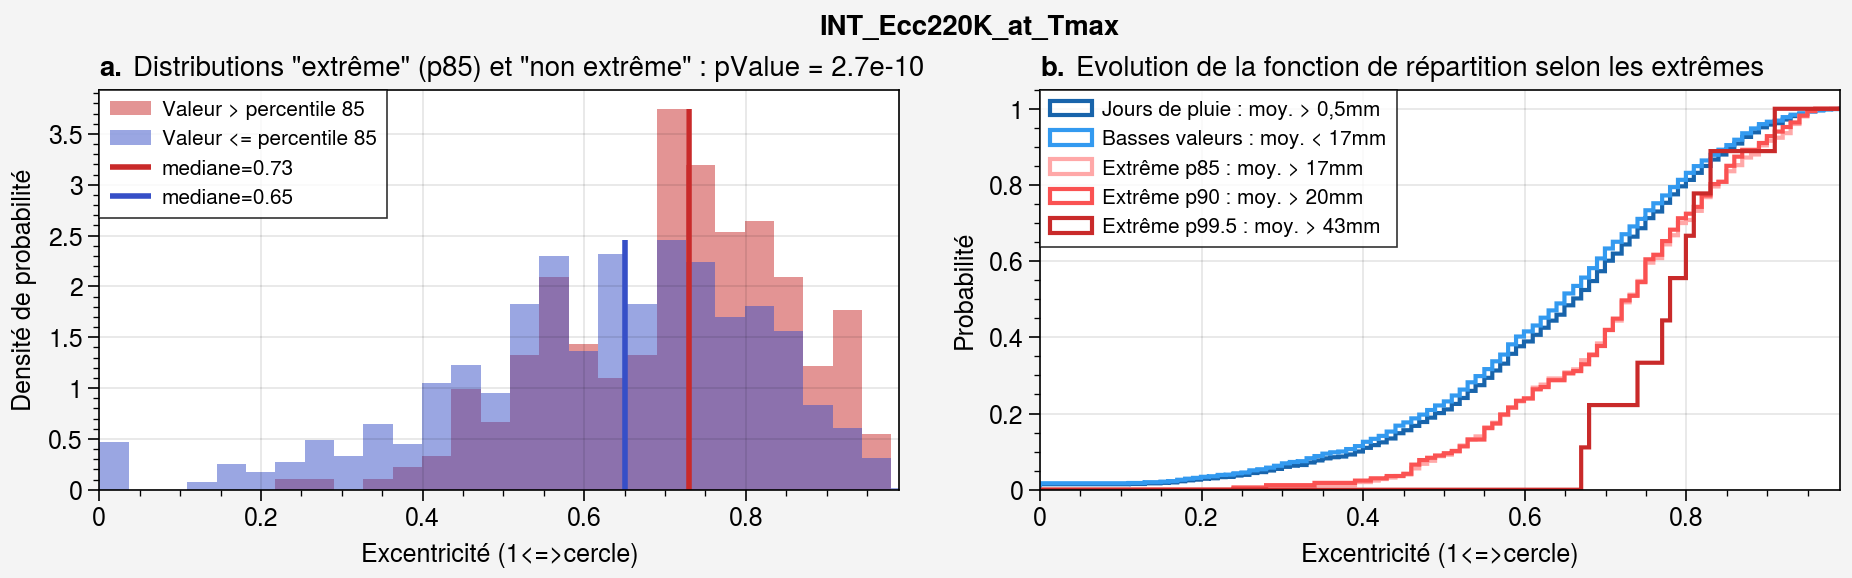

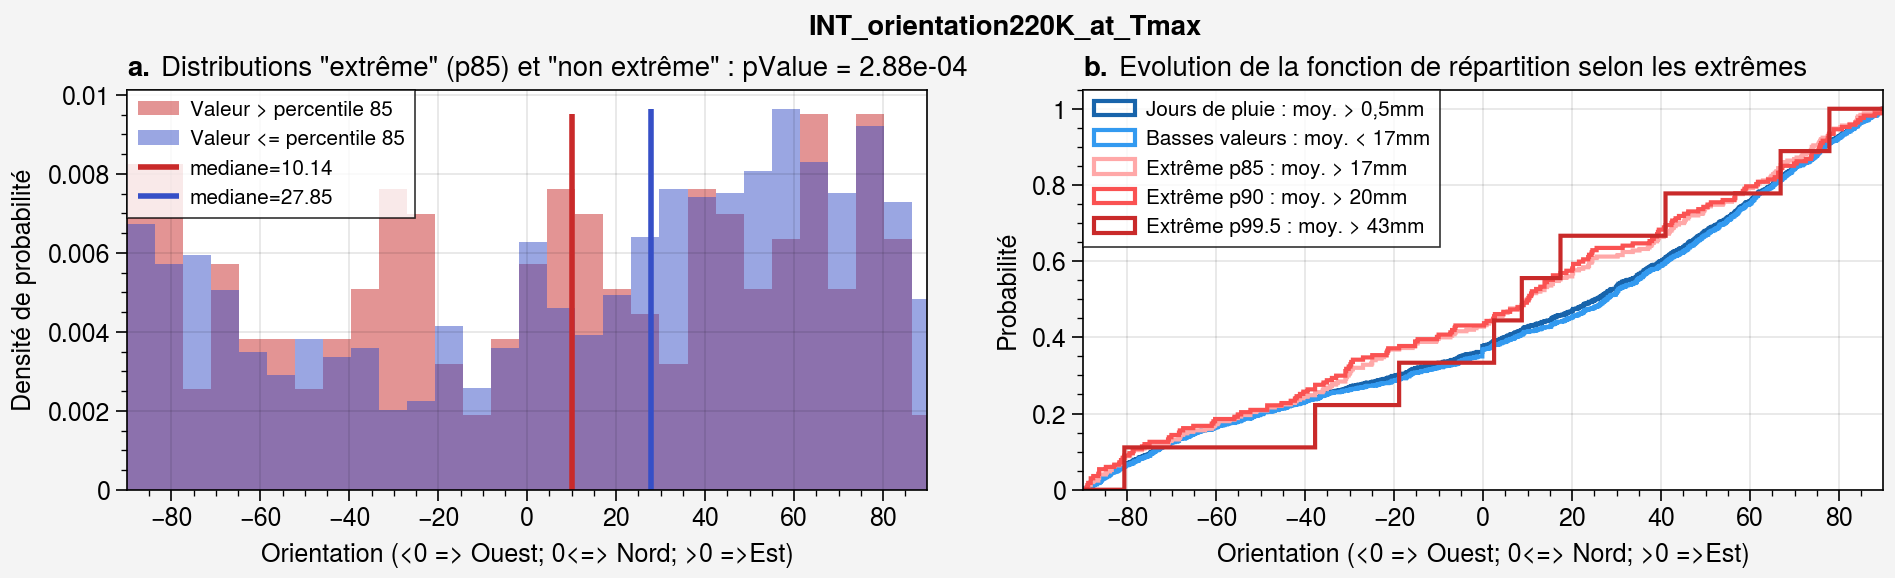

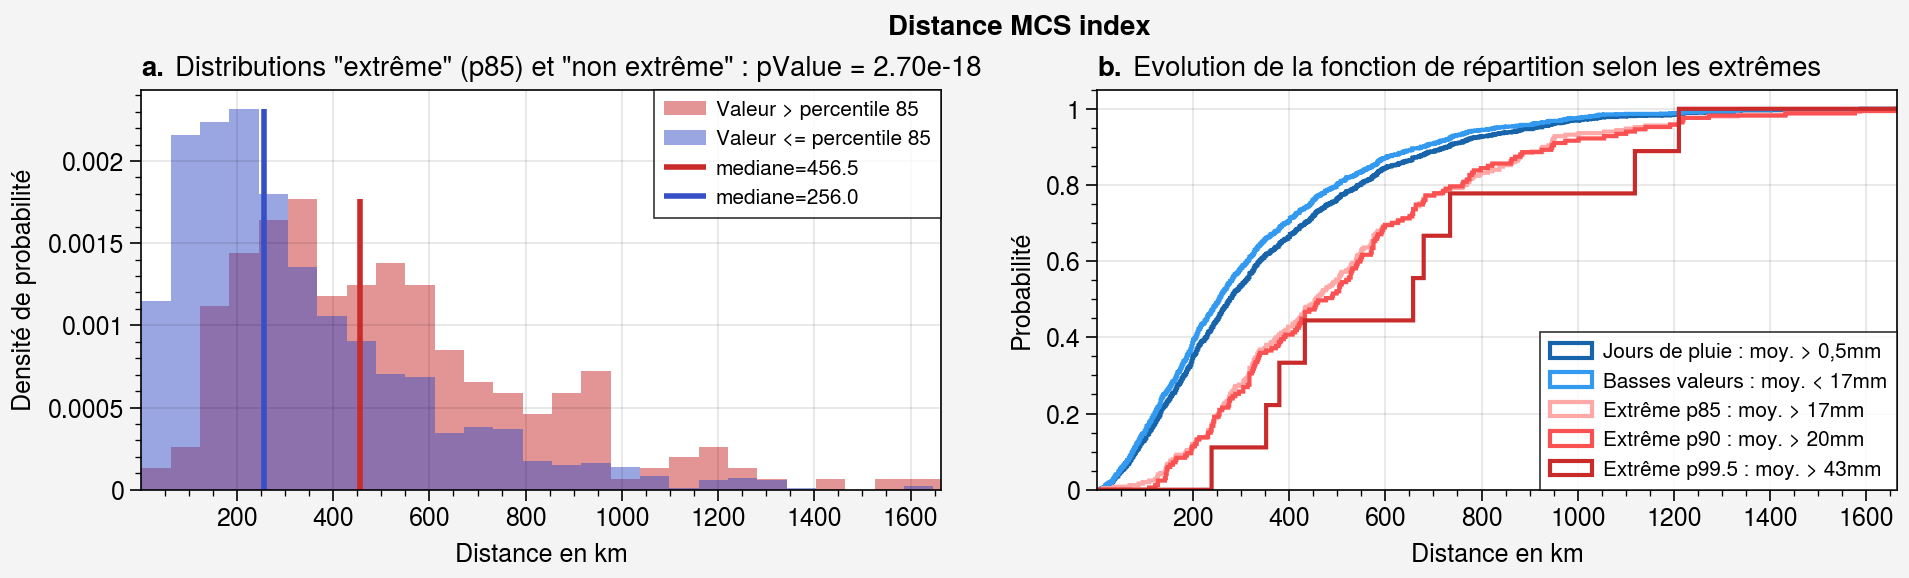

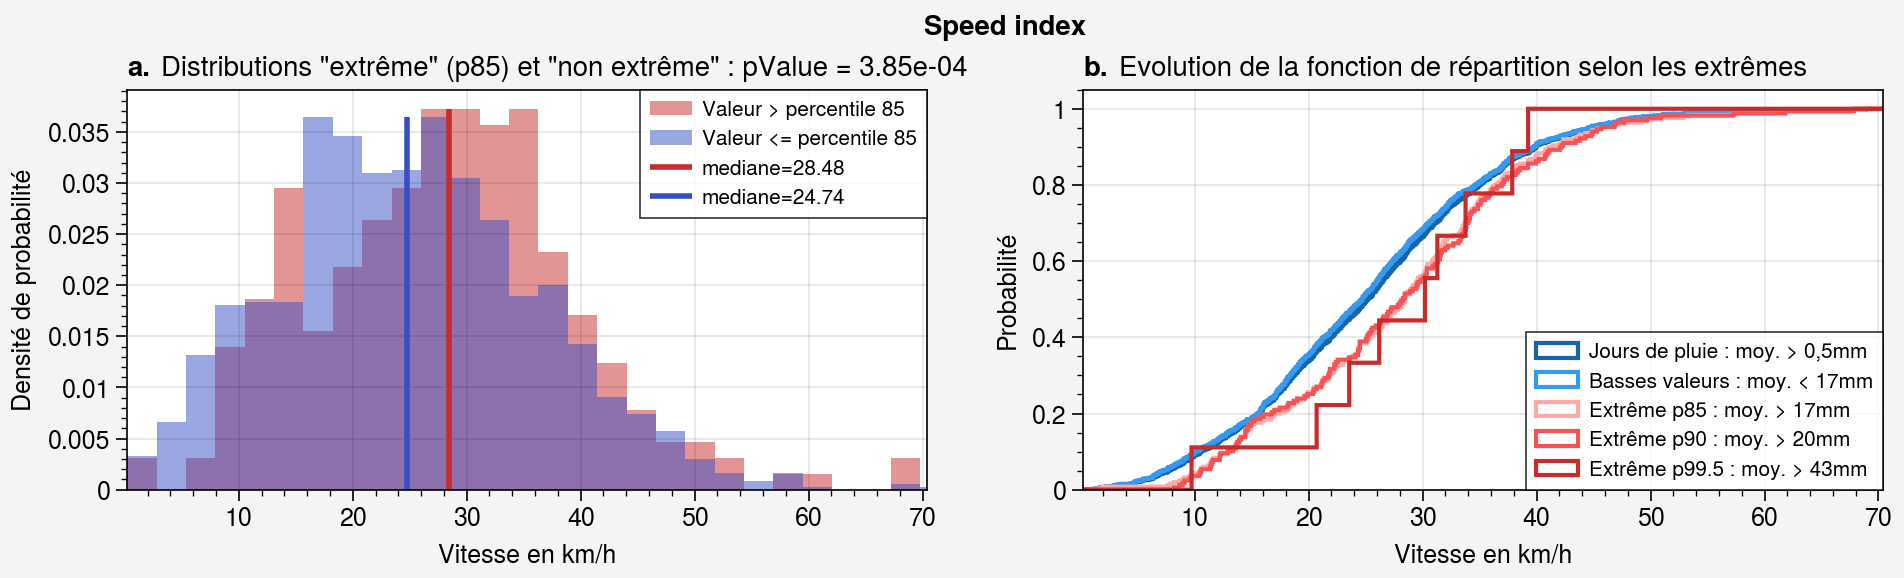

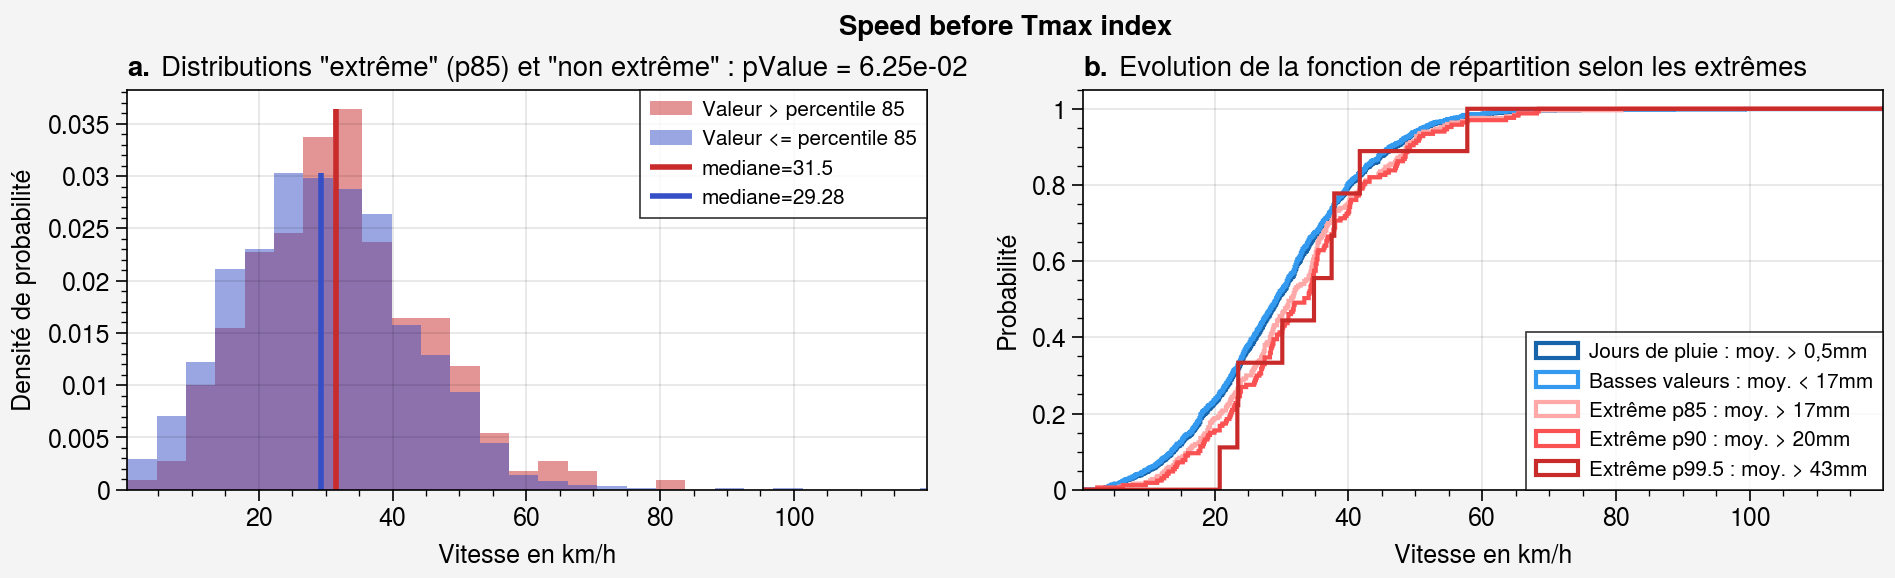

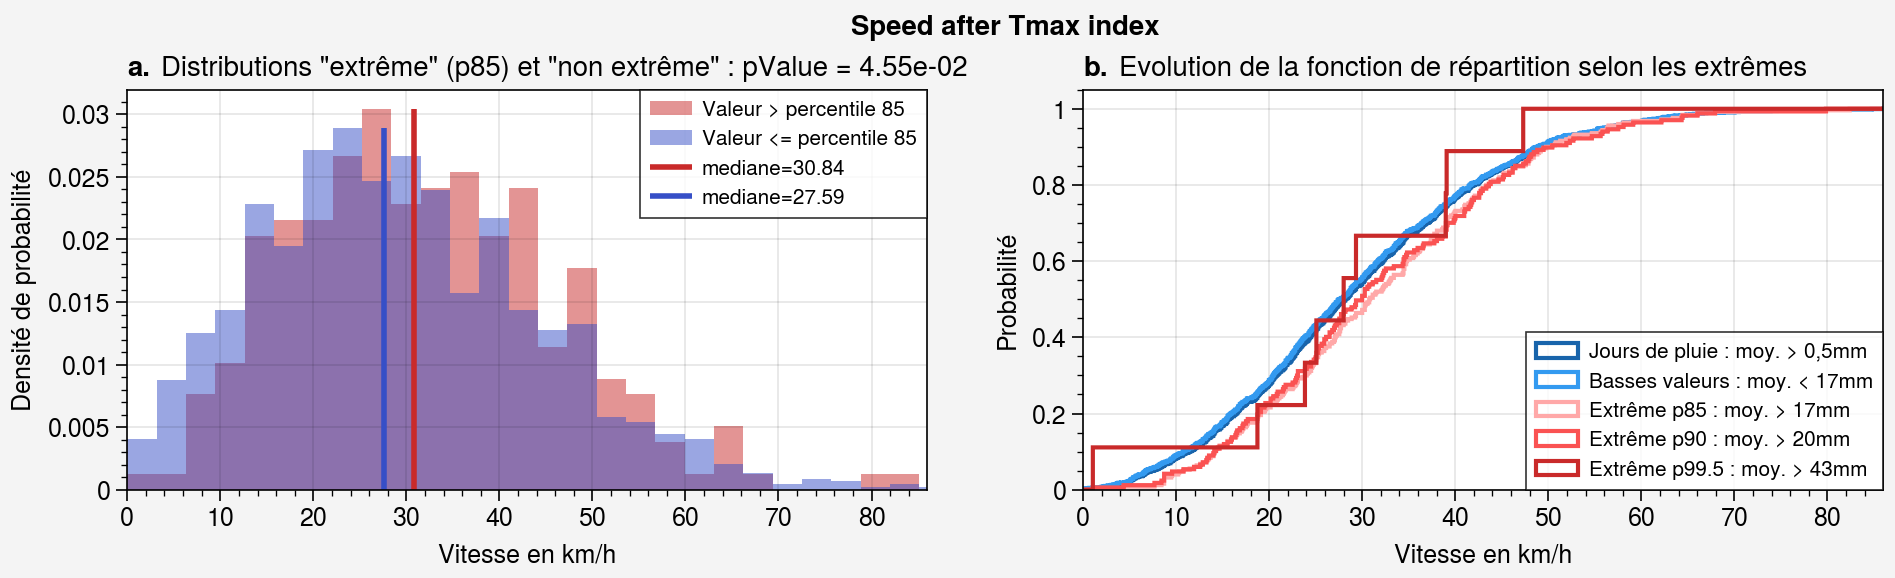

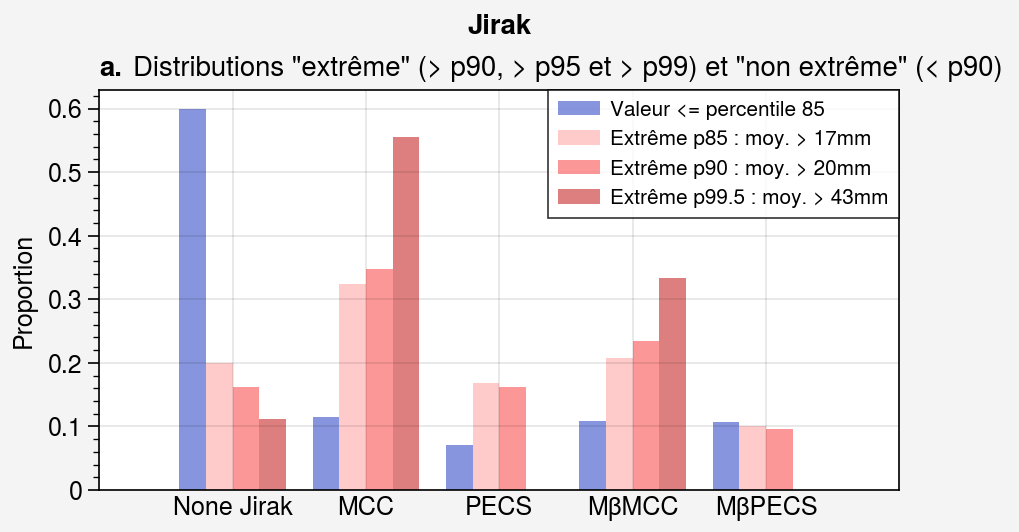

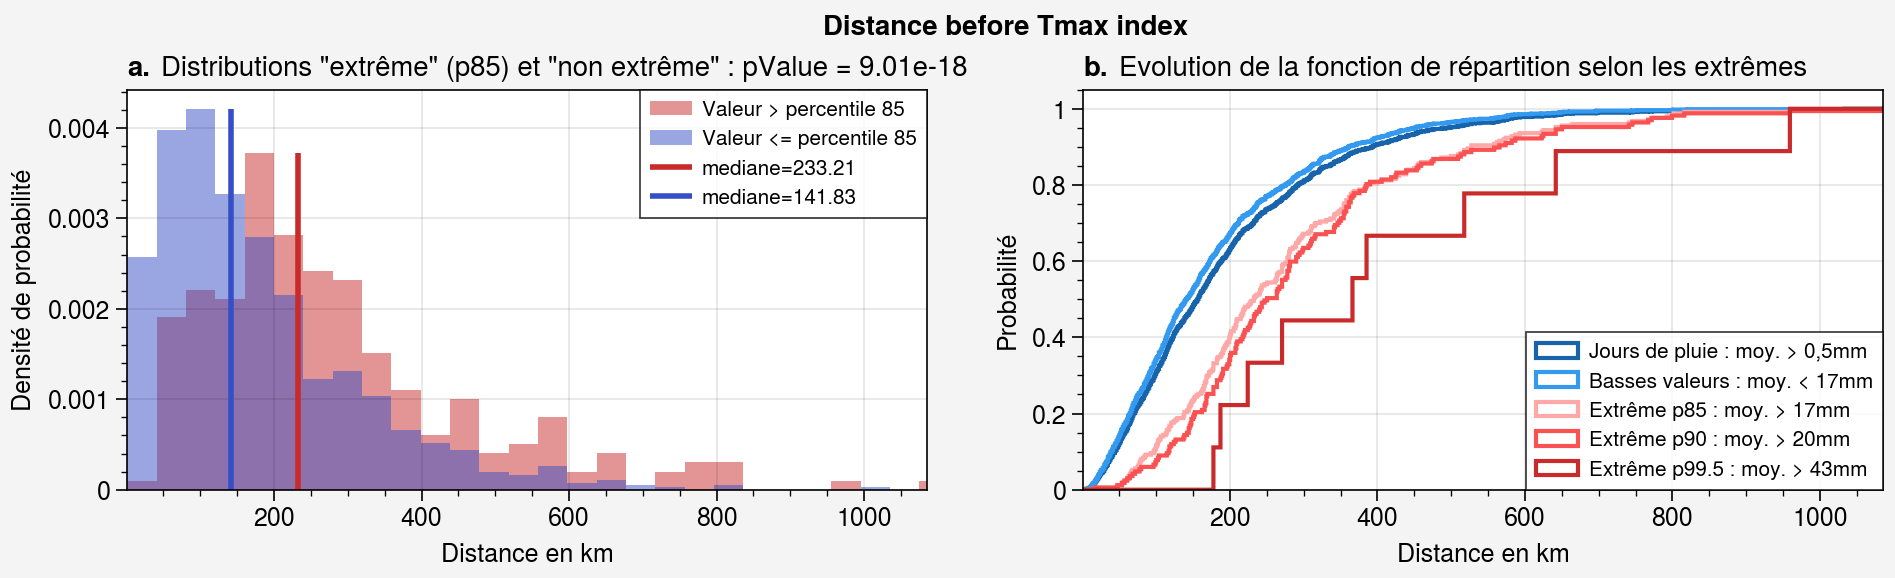

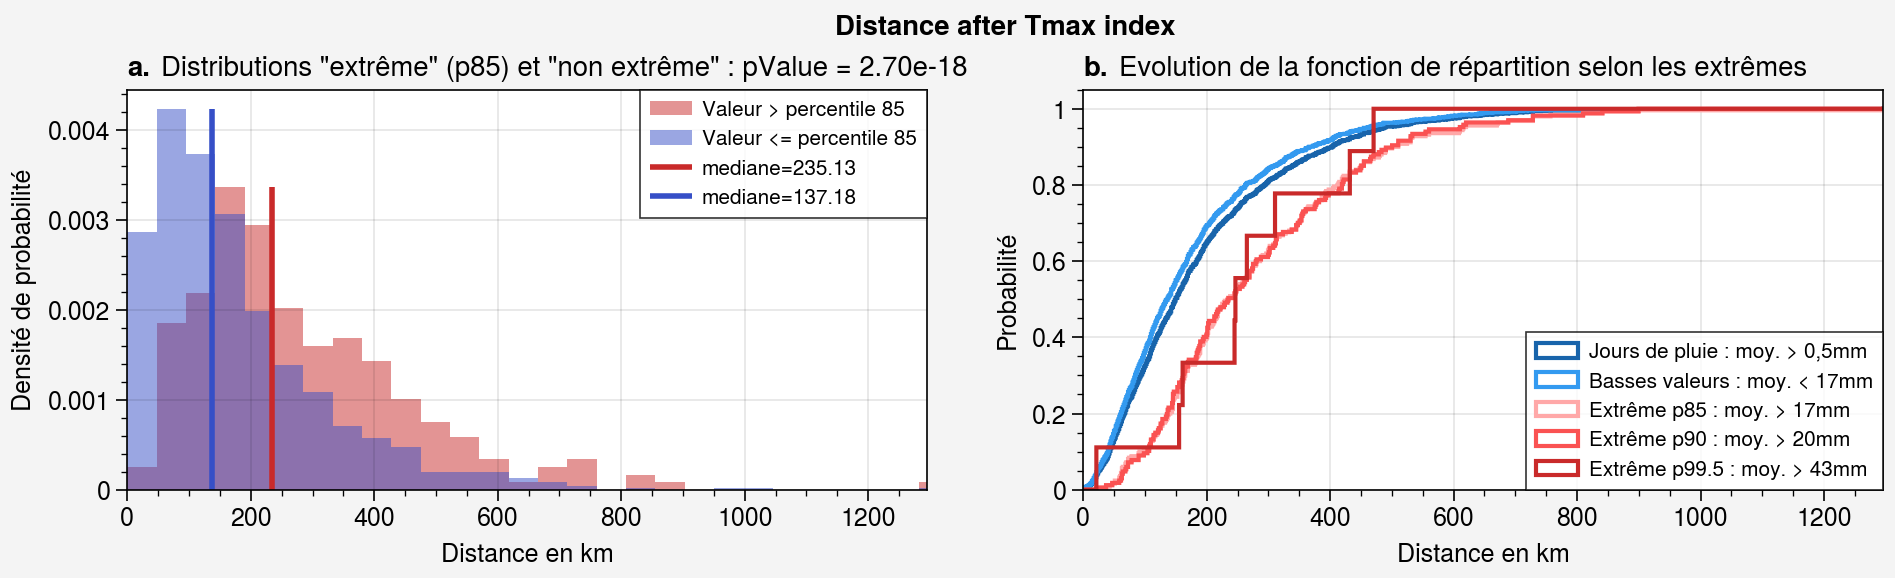

In [5]:
Run_MCS_Climatology.PlotMCSClimatology(t1, t2, wantedIndice, [85,90,99.5])